11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 784)
Test shape: (10000, 784)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model 1 (Adam + ReLU) Test Accuracy: 0.9793


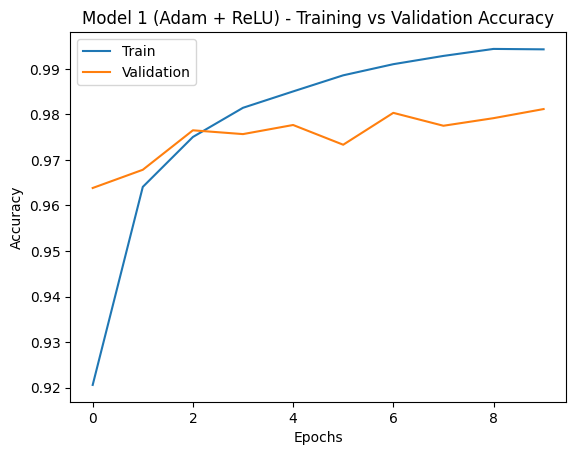

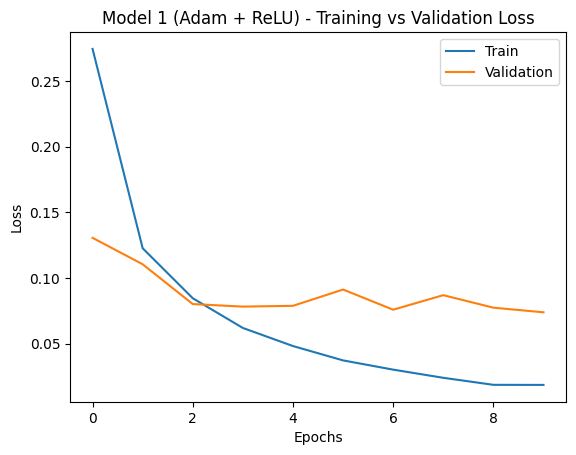

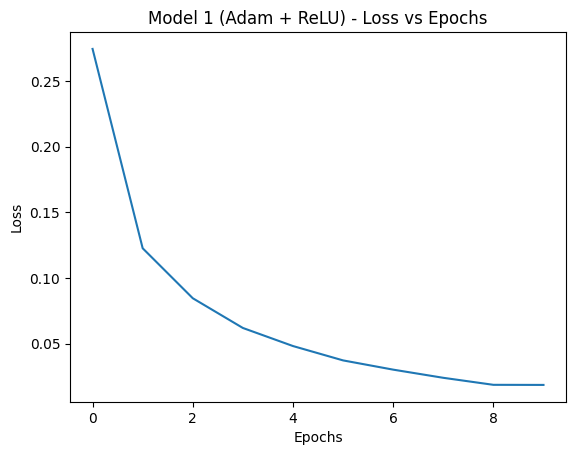


Model 2 (Deep + Adam) Test Accuracy: 0.9742


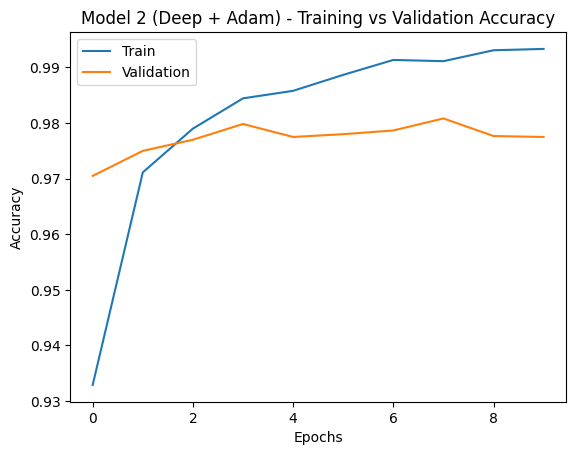

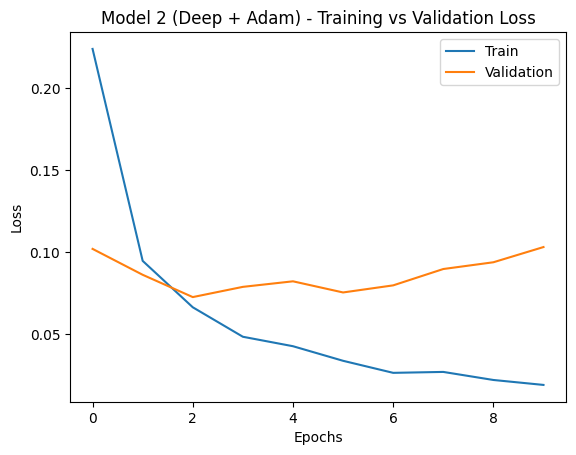

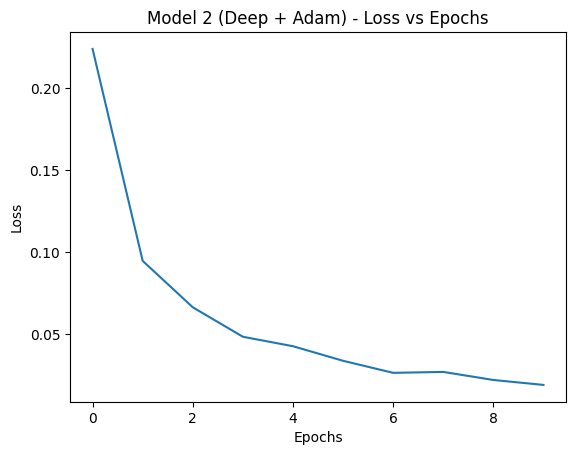


Model 3 (SGD) Test Accuracy: 0.9486


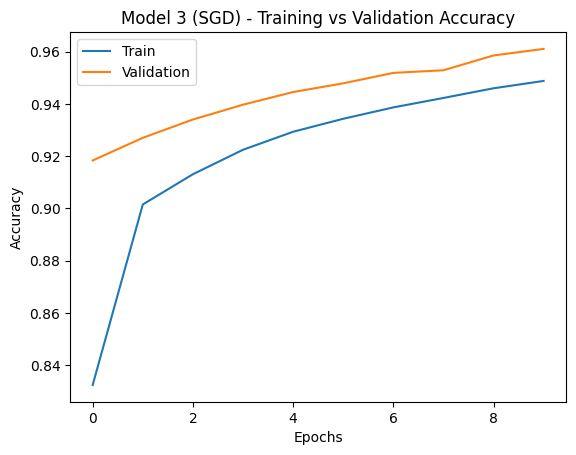

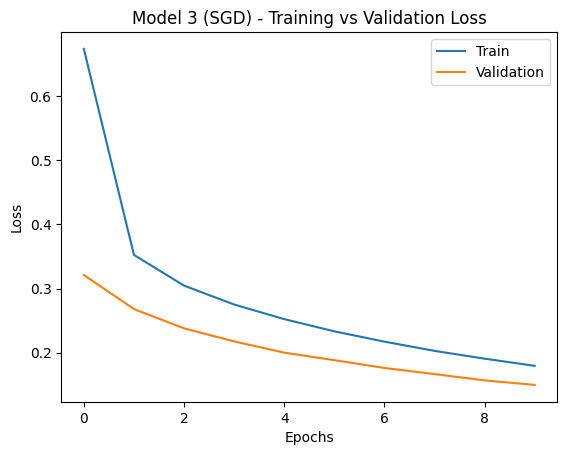

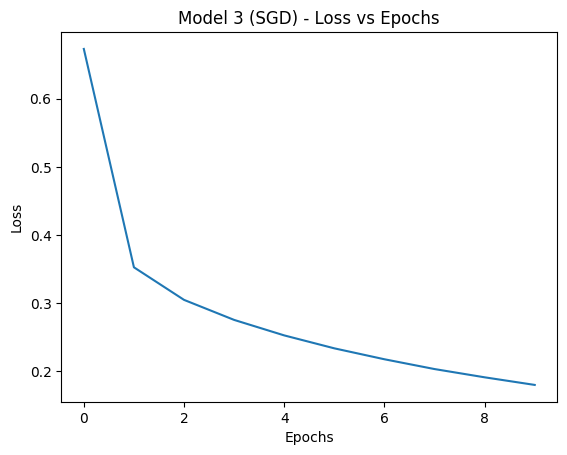


Model 4 (Sigmoid) Test Accuracy: 0.9763


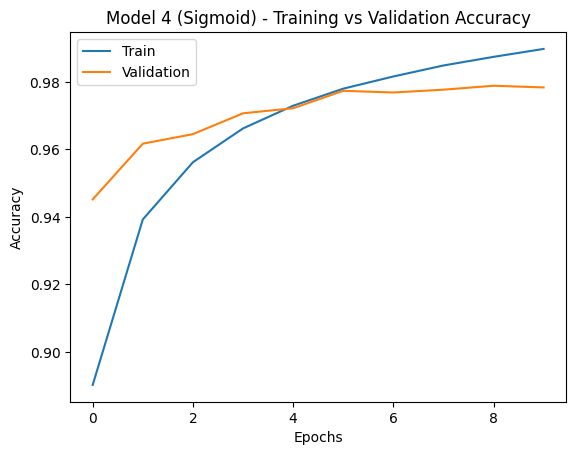

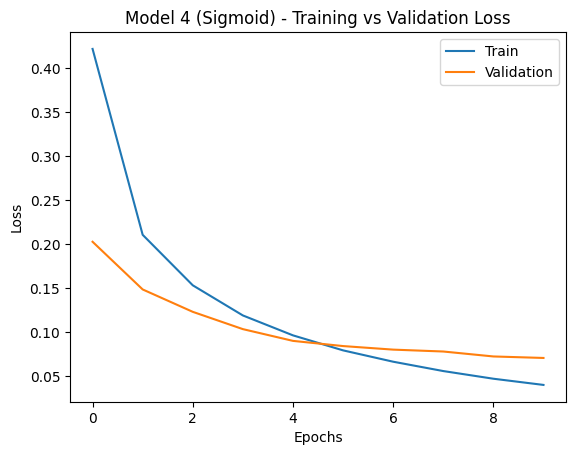

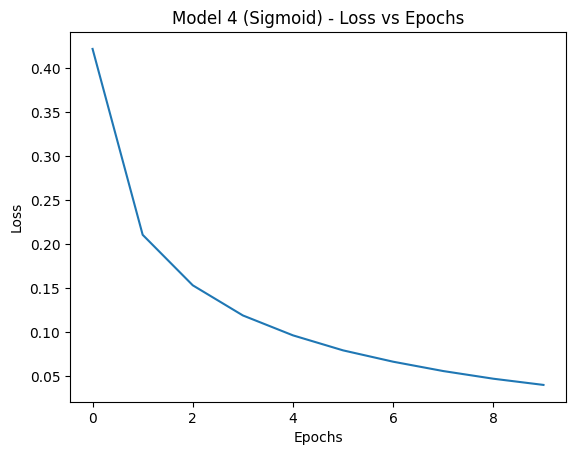

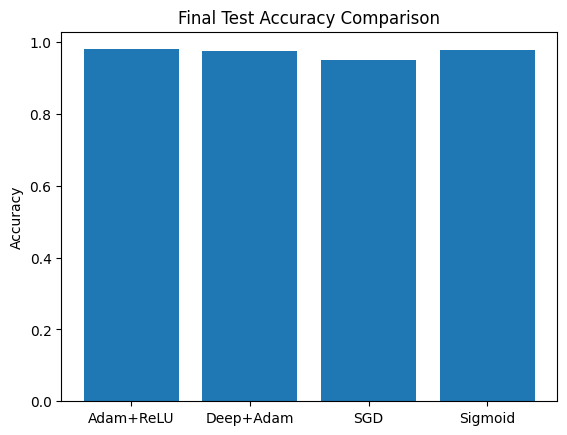

In [1]:
# MNIST Case Study - Multiple MLP Comparison


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  DATASET HANDLING

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape (28x28 → 784)
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)


# FUNCTION TO TRAIN MODEL

def train_and_plot(model, model_name):

    model.compile(
        optimizer=model.optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{model_name} Test Accuracy: {test_acc:.4f}")


    # REQUIRED PLOTS


    #  Training vs Validation Accuracy
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f"{model_name} - Training vs Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"])
    plt.show()

    #  Training vs Validation Loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f"{model_name} - Training vs Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation"])
    plt.show()

    #  Loss vs Epochs
    plt.figure()
    plt.plot(history.history['loss'])
    plt.title(f"{model_name} - Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    return history, test_acc


# MODEL 1 - Basic (Adam + ReLU)


model1 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model1.optimizer = 'adam'

hist1, acc1 = train_and_plot(model1, "Model 1 (Adam + ReLU)")


# MODEL 2 - Deep Network


model2 = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model2.optimizer = 'adam'

hist2, acc2 = train_and_plot(model2, "Model 2 (Deep + Adam)")


# MODEL 3 - SGD Optimizer


model3 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model3.optimizer = 'sgd'

hist3, acc3 = train_and_plot(model3, "Model 3 (SGD)")


# MODEL 4 - Sigmoid Activation


model4 = Sequential([
    Dense(128, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model4.optimizer = 'adam'

hist4, acc4 = train_and_plot(model4, "Model 4 (Sigmoid)")


#  FINAL COMPARISON BAR GRAPH


plt.figure()
models = ['Adam+ReLU', 'Deep+Adam', 'SGD', 'Sigmoid']
accuracies = [acc1, acc2, acc3, acc4]

plt.bar(models, accuracies)
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
